In [1]:
#today we will build a weather forecasting using simple linear regression

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\parin\Downloads\archive (3)\city_temperature.csv")

C:\Users\parin\AppData\Local\Temp\ipykernel_22488\1216574594.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\parin\Downloads\archive (3)\city_temperature.csv")


In [4]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [6]:
df.sample(20)

,Region,Country,State,City,Month,Day,Year,AvgTemperature
1244696,South/Central America & Carribean,Bahamas,NaN,Nassau,11,14,2005,79.0
2692251,North America,US,Texas,El Paso,11,24,2010,56.9
2848051,North America,US,West Virginia,Elkins,3,25,2006,34.3
2541878,North America,US,Pennsylvania,Wilkes Barre,1,22,2005,2.8
371412,Asia,Japan,NaN,Sapporo,1,9,2004,17.2
1537271,North America,US,Arizona,Tucson,7,6,2018,94.2
637834,Europe,Austria,NaN,Vienna,3,19,2009,35.6
2128149,North America,US,Mississippi,Tupelo,3,9,2004,51.9
1488724,North America,US,Alaska,Anchorage,11,5,1996,33.7
1925204,North America,US,Kansas,Goodland,2,12,1997,24.6


In [10]:
#filter the data for india and removing 
df_india = df[(df['Country']=='India') & (df['AvgTemperature'] > -99)]

In [11]:
df_india.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
312523,Asia,India,NaN,Bombay (Mumbai),1,1,1995,71.8
312524,Asia,India,NaN,Bombay (Mumbai),1,2,1995,72.0
312525,Asia,India,NaN,Bombay (Mumbai),1,3,1995,70.3
312526,Asia,India,NaN,Bombay (Mumbai),1,4,1995,69.7
312527,Asia,India,NaN,Bombay (Mumbai),1,5,1995,71.3


In [12]:
df_india.shape

(36903, 8)

In [16]:
#combining the month, day and year into a single month, day , year column as our linear linear regression model does not understand string that better

df_india.loc[:,'Date'] = pd.to_datetime(df_india[['Year','Month','Day']])

In [17]:
df_india

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
312523,Asia,India,NaN,Bombay (Mumbai),1,1,1995,71.8,1995-01-01
312524,Asia,India,NaN,Bombay (Mumbai),1,2,1995,72.0,1995-01-02
312525,Asia,India,NaN,Bombay (Mumbai),1,3,1995,70.3,1995-01-03
312526,Asia,India,NaN,Bombay (Mumbai),1,4,1995,69.7,1995-01-04
312527,Asia,India,NaN,Bombay (Mumbai),1,5,1995,71.3,1995-01-05
...,...,...,...,...,...,...,...,...,...
349581,Asia,India,NaN,Delhi,5,8,2020,89.9,2020-05-08
349582,Asia,India,NaN,Delhi,5,9,2020,92.3,2020-05-09
349583,Asia,India,NaN,Delhi,5,10,2020,81.9,2020-05-10
349584,Asia,India,NaN,Delhi,5,11,2020,84.7,2020-05-11


In [18]:
#select the relevant columns(Datetime, AvgTemperature)
rel_df_india = df_india[['Date','AvgTemperature']]

In [19]:
rel_df_india

,Date,AvgTemperature
312523,1995-01-01,71.8
312524,1995-01-02,72.0
312525,1995-01-03,70.3
312526,1995-01-04,69.7
312527,1995-01-05,71.3
...,...,...
349581,2020-05-08,89.9
349582,2020-05-09,92.3
349583,2020-05-10,81.9
349584,2020-05-11,84.7


In [20]:
#preprocessing the data

#we will drop the missing values
#weather data is measured daily and missing values will be very few, so removing the missing rows will not be much problem.

rel_df_india = rel_df_india.dropna()

In [23]:
#so now we will convert the date into date ordinal that will contain the numerical value of each column that would be useful for the linear regression

rel_df_india['Date_ordinal'] = rel_df_india['Date'].map(pd.Timestamp.toordinal)

In [24]:
rel_df_india

,Date,AvgTemperature,Date_ordinal
312523,1995-01-01,71.8,728294
312524,1995-01-02,72.0,728295
312525,1995-01-03,70.3,728296
312526,1995-01-04,69.7,728297
312527,1995-01-05,71.3,728298
...,...,...,...
349581,2020-05-08,89.9,737553
349582,2020-05-09,92.3,737554
349583,2020-05-10,81.9,737555
349584,2020-05-11,84.7,737556


In [27]:
X = rel_df_india[['Date_ordinal']]
y = rel_df_india['AvgTemperature']

#train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42)

In [28]:
#Building the model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mse

74.02526667219969

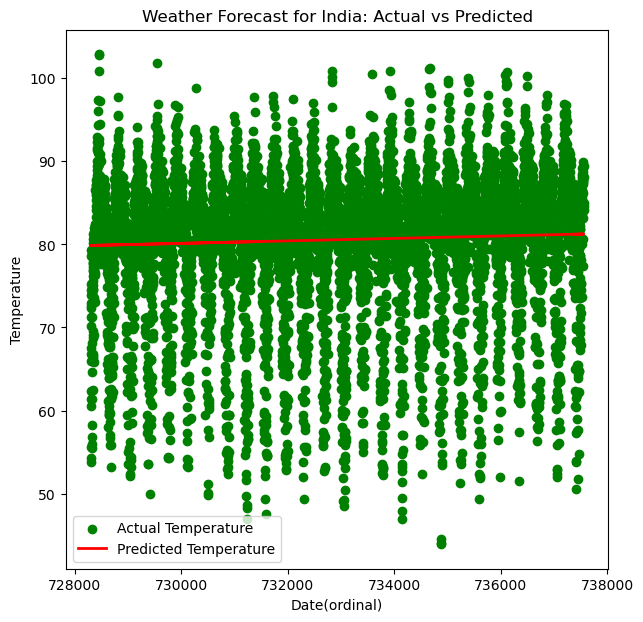

In [31]:
#visualisation

plt.figure(figsize = (7,7))
plt.scatter(X_test, y_test , color = 'green' , label = 'Actual Temperature')
plt.plot(X_test, y_pred, color = 'Red' , linewidth = 2, label = 'Predicted Temperature')
plt.xlabel("Date(ordinal)")
plt.ylabel("Temperature")
plt.title('Weather Forecast for India: Actual vs Predicted')
plt.legend()
plt.show()

In [ ]:
#The accuracy is 74%
# as we can see that our model is performing very badly , 
# so we can increase the complexity by using another features or using other models like polynomial regression and maybe using ARIMA i.e. Time Series Models. 
